# Gradient Descent

### Author: Beixian Gu

## Table of Contents
- Introduction
- Alhorithm of Linear Regression Model
- Gradient Descent Algorithm
- Equations and Notations
- Application on Datasets

## Introduction

Gradient descent is an optimization algorithm that is widely used in machine learning and deep learning. It is used to find the minimum of a differentiable function, often called the "cost" or "loss" function, which represents the error between the predictions of a model and the actual target values. 

In the context of linear regression, the goal is to find the best-fitting line that minimizes the squared errors between the predicted values and the actual values. The cost function for linear regression is the residual sum of squares (RSS), which measures the squared difference between the predicted and actual values.


## Algorithm of Linear Regression Model

Consider a linear regression model with parameters (or weights) denoted by the vector $theta$. The model's goal is to minimize the cost function $J(\theta)$, which represents the mean squared error (MSE) between the predicted output and the actual output.

The linear regression model can be represented as follows:

$$y = X\theta + ε$$

where $y$ is the target variable, $X$ is the matrix of input features, $\theta$ is the vector of model parameters, and $\varepsilon$ is the error term.

### Cost Function

For linear regression, the cost function is the mean squared error (MSE):

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^m (y_i-\theta_0+\theta_1x_i)^2$$

where $m$ is the number of data points, and $x_i$ and $y_i$ represent the input feature and target value of the i-th data point, respectively.

## Gradient Descent Algorithm

The gradient descent algorithm is based on the observation that the function decreases fastest in the direction of the negative gradient. The algorithm iteratively updates the model parameters (in the case of linear regression, the coefficients) by moving them in the direction of the negative gradient, scaled by a learning rate.

The algorithm for gradient descent in linear regression is as follows:

1. Define the loss function, which is the residual sum of squares (RSS) divided by 2:

   $$L(\boldsymbol{\beta}) = \frac{1}{2} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^{p} {\beta_j x_{ij}})^2$$

2. Calculate the partial derivatives of the loss function with respect to the coefficients:

   $$\frac{\partial L}{\partial \beta_0} = \sum_{i=1}^{n}(\beta_0 + \sum_{j=1}^{p} {\beta_j x_{ij}} - y_{i})$$
   
   $$\frac{\partial L}{\partial \beta_j} = \sum_{i=1}^{n}(\beta_0 + \sum_{j=1}^{p} {\beta_j x_{ij}} - y_{i})x_{ij},  j=1 \dots p$$

3. Initialize the learning rate, model parameters, maximum number of training steps, and threshold. Then, iteratively update the coefficients using the following formula:

   $$\beta_j = \beta_j - \gamma \frac{\partial L}{\partial \beta_j}, j=0 \dots p$$

   The iteration continues until the maximum number of training steps is reached or the change in loss between two training steps is below the threshold.

4. Return the learned coefficients, which define the best-fitting line.

## Equations and Notations

- Cost function: $J(\theta)$
- Model parameters: $\theta$ (vector).
- Learning rate: $\alpha$
- Gradient: $\triangledown J(\theta)$ (vector)
- Partial derivative of $J(\theta)$w.r.t $\theta_i: \frac{\partial J(\theta)}{\partial \theta_i}$ 

For linear regression, the partial derivatives of the cost function with respect to the parameters are as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_0}= \frac{1}{m} \sum (\theta_0+\theta_1 x_i-y_i)
\frac{\partial J(\theta)}{\partial \theta_1}= \frac{1}{m} \sum ((\theta_0+\theta_1 x_i-y_i)x_i)
$$

The update rules for the Gradient Descent algorithm for linear regression are:
$$
\theta_0 = \theta_0 - \alpha  \frac{1}{m} \sum (\theta_0+\theta_1 x_i-y_i)
\theta_1 = \theta_1 - \alpha  \frac{1}{m} \sum ((\theta_0+\theta_1 x_i-y_i)x_i)
$$


Repeat these steps until convergence or a predefined number of iterations is reached.



## Application on Datasets
- House price data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Import data and remove the missing data

In [10]:
data = pd.read_csv("house price.csv")

data = data.dropna()

X = data.drop("price", axis=1)
y = data["price"]

Train the data and apply Linear Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Display the MSE and R^2

Intercept: 38167619.85963433
Coefficients: [-1.12809136e+05  1.12436445e+05  5.08284225e+02 -2.18678334e+01
 -3.86721516e+02]
Mean Squared Error: 99786223089.67572
R2 Score: 0.6993344374021936


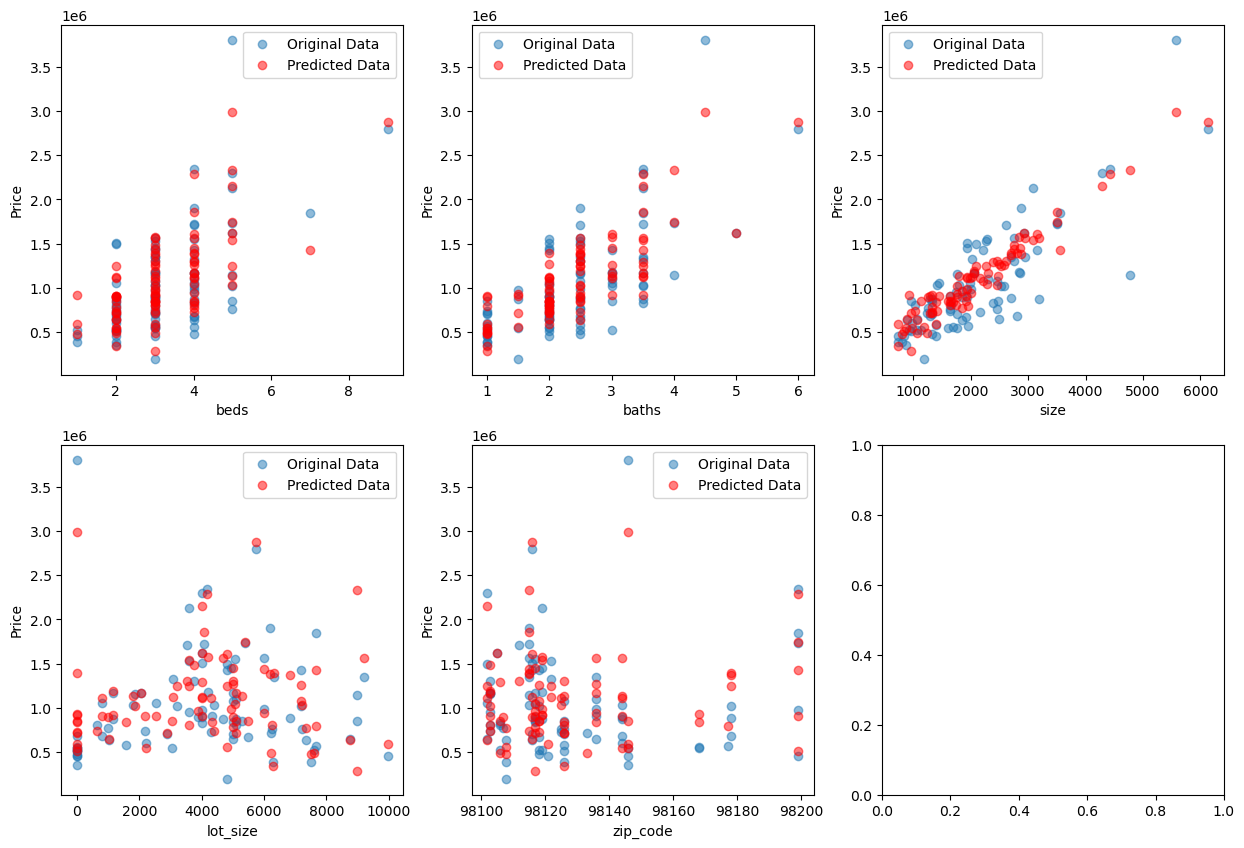

In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(X.columns):
    row = i // 3
    col = i % 3
    
    axes[row, col].scatter(X_test[column], y_test, alpha=0.5, label="Original Data")
    axes[row, col].scatter(X_test[column], y_pred, color="red", alpha=0.5, label="Predicted Data")
    
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Price")
    axes[row, col].legend()

plt.show()